In [2]:
!pip install scikit-image watermark -q

# Install OpenCV package first
!pip install opencv-python -q

# First install the required system library
!apt-get update && apt-get install -y libgl1-mesa-glx

!pip install opencv-python

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

##Lectura, Guardado y Visualización de Imágenes con PIL/Pillow

In [3]:
from PIL import Image  # Importar la clase Image
import matplotlib.pyplot as plt  # Para visualización

##Cargar una Imagen

Opcion A: Cargar una Imagen desde Google Colab

In [4]:
im = Image.open('/content/Puma_nieve.jpeg')  # Cargar desde URL

##Propiedades Básicas de la Imagen

In [5]:
print(f"""
Ancho: {im.width} píxeles
Alto: {im.height} píxeles
Modo: {im.mode} (RGB, L=Escala de grises, etc.)
Formato: {im.format}
Tipo de objeto: {type(im)}
""")


Ancho: 439 píxeles
Alto: 673 píxeles
Modo: RGB (RGB, L=Escala de grises, etc.)
Formato: JPEG
Tipo de objeto: <class 'PIL.JpegImagePlugin.JpegImageFile'>



##Visualizar la Imagen

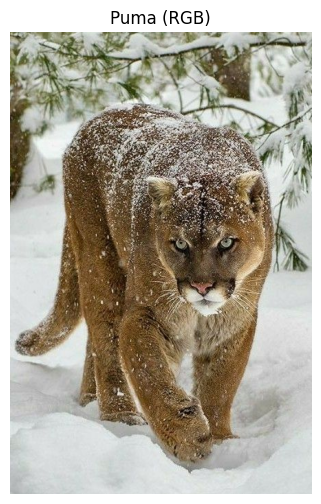

In [7]:
plt.figure(figsize=(8, 6))
plt.imshow(im)
plt.axis('off')  # Ocultar ejes
plt.title("Puma (RGB)")
plt.show()

Convertir a Escala de Grises y Guardar

In [9]:
im_gris = im.convert('L')  # 'L' = Escala de grises

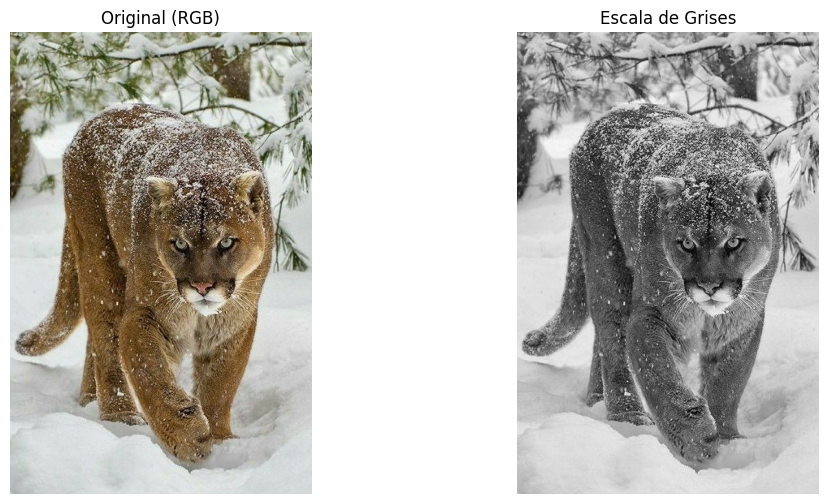

In [10]:
# Mostrar ambas imágenes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(im); axes[0].set_title("Original (RGB)"); axes[0].axis('off')
axes[1].imshow(im_gris, cmap='gray'); axes[1].set_title("Escala de Grises"); axes[1].axis('off')
plt.show()

In [11]:
# Guardar la nueva imagen
im_gris.save("puma_gris.jpg")  # Se guarda en el sistema de archivos

¿Qué pasa si convertimos la imagen a modo '1' (binario: blanco y negro puro)?

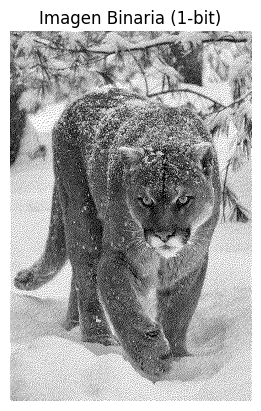

In [12]:
im_binaria = im.convert('1')  # 1-bit
plt.imshow(im_binaria, cmap='gray')
plt.title("Imagen Binaria (1-bit)")
plt.axis('off')
plt.show()

Explicaciones Clave

    Image.open(): Carga la imagen en un objeto PIL.Image.

    Modos de imagen:

        'RGB': 3 canales (Red, Green, Blue).

        'L': Escala de grises (Luminance).

        '1': Binario (blanco/negro).

    Guardado: Usar im.save("nombre.ext") (soporta PNG, JPEG, etc.).

##Lectura, Guardado y Visualización de Imágenes con Matplotlib

###Importar Bibliotecas

En Google Colab, matplotlib y numpy ya están instalados:

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

###Cargar una Imagen

In [14]:
im = mpimg.imread('/content/Leopardo.jpeg')

###Propiedades de la Imagen

Matplotlib carga la imagen como un array NumPy con valores normalizados (float32 entre 0 y 1):

In [15]:
print(f"""
Dimensiones (alto, ancho, canales): {im.shape}
Tipo de dato: {im.dtype}
Tipo de objeto: {type(im)}
""")


Dimensiones (alto, ancho, canales): (600, 453, 3)
Tipo de dato: uint8
Tipo de objeto: <class 'numpy.ndarray'>



###Visualizar la Imagen

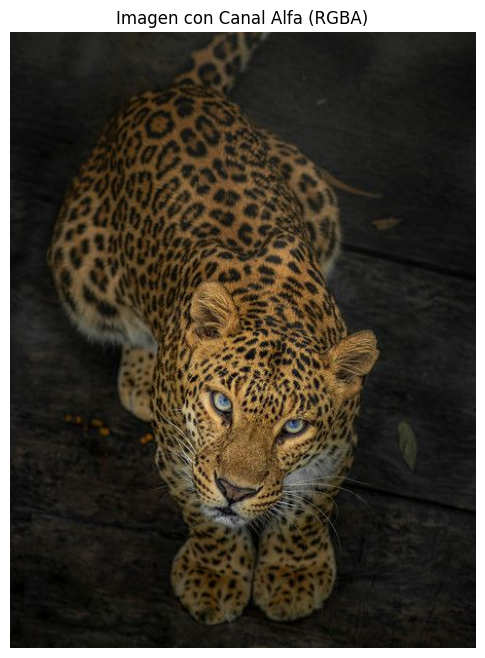

In [16]:
plt.figure(figsize=(10, 8))
plt.imshow(im)
plt.axis('off')  # Ocultar ejes
plt.title("Imagen con Canal Alfa (RGBA)")
plt.show()

###Convertir y Guardar la Imagen

Ejemplo: Convertir a escala de grises y guardar:

In [17]:
# Convertir a grises (promedio de canales RGB, ignorando canal alfa)
im_gris = np.mean(im[:, :, :3], axis=2)  # Canales R+G+B / 3

In [19]:
# Guardar con matplotlib (normalizar a 0-255 si es necesario)
plt.imsave("leopard_gris.png", im_gris, cmap='gray')  # Guardar en Colab

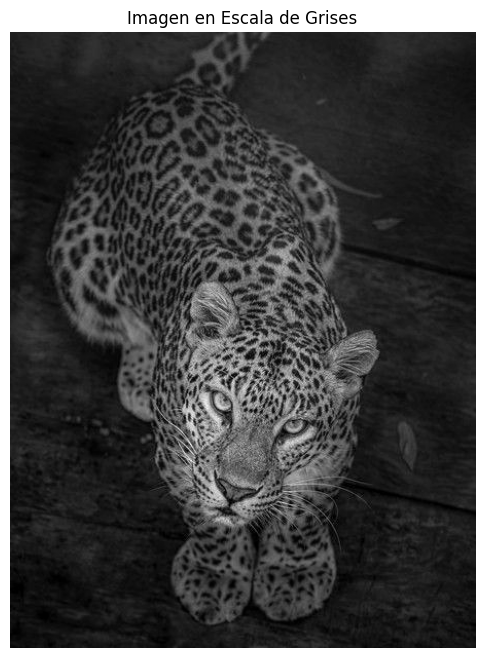

In [20]:
plt.figure(figsize=(10, 8))
plt.imshow(im_gris, cmap='gray')
plt.axis('off')  # Ocultar ejes
plt.title("Imagen en Escala de Grises")
plt.show()

###Interpolación en Visualización con matplotlib.imshow()

Explorar métodos de interpolación al visualizar imágenes pequeñas para entender cómo afectan la calidad aparente.

###Verificar tamaño:

In [21]:
im = mpimg.imread('/content/leopard_gris.png')

In [22]:
print("Dimensiones de la imagen:", im.shape)  # Debería ser pequeña (ej. 50x50)

Dimensiones de la imagen: (600, 453, 4)


###Visualizar con Diferentes Métodos de Interpolación

Lista de métodos disponibles:

In [23]:
metodos = ['none', 'nearest', 'bilinear', 'bicubic', 'spline16', 'lanczos']

###Código para comparar métodos:

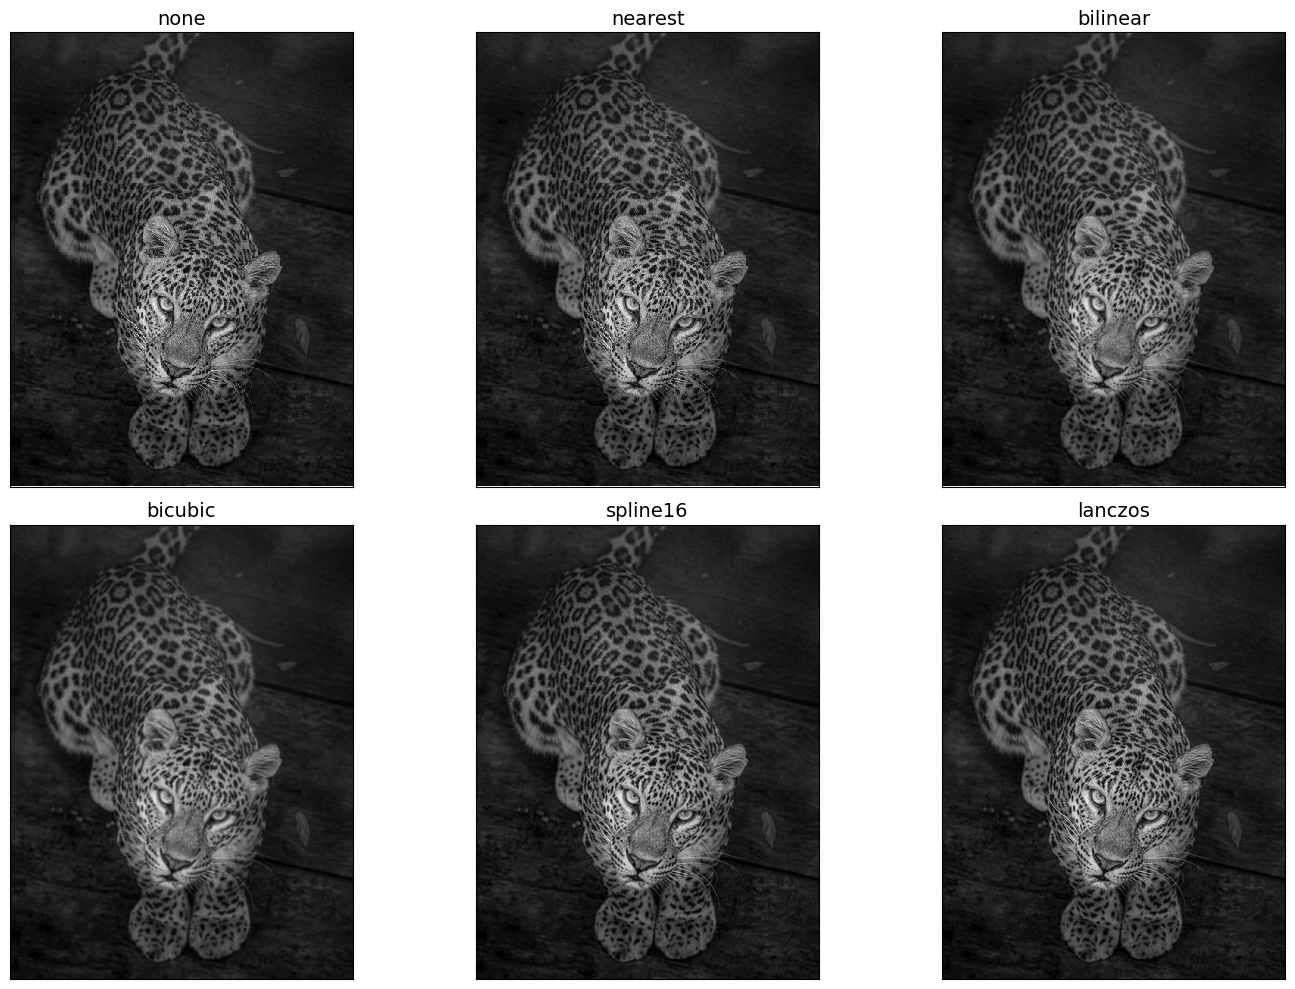

In [24]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for ax, metodo in zip(axes.flat, metodos):
    ax.imshow(im, interpolation=metodo)
    ax.set_title(metodo, fontsize=14)
plt.tight_layout()
plt.show()

| Método | Descripción | Uso Típico |
|---|---|---|
| 'none' | Sin interpolación (píxeles bloqueados). | Imágenes pixeladas. |
| 'nearest' | Interpolación por vecino más cercano (rápido, bajo costo computacional). | Gráficos simples. |
| 'bilinear' | Interpolación lineal en una cuadrícula 2x2. | Balance calidad-velocidad. |
| 'bicubic' | Interpolación cúbica en una cuadrícula 4x4 (mejor calidad que bilinear). | Fotografías. |
| 'spline16' | Interpolación spline de orden 16. | Alta calidad (lento). |
| 'lanczos' | Interpolación con filtro Lanczos (alta calidad, antialiasing). | Detalle fino (ej. astronomía). |

### Notas Clave

**Contexto:** La interpolación solo afecta la visualización, no modifica los datos originales.

**¿Cuándo usarla?:**

*   `'nearest'` para imágenes pixeladas (ej. arte retro).
*   `'bicubic'` o `'lanczos'` para ampliar imágenes pequeñas sin perder detalle aparente.